# Figure

In [1]:
import pathlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
#import numpy as np
rootdir = pathlib.Path('.').resolve(strict=True)
outputdir = rootdir.parents [1] / 'files/output_files'

In [2]:
# import main dataset
main_dataset = pd.read_csv(outputdir / 'SARS-CoV-2-RBD_ACE2_benchmarking_dataset.csv', delimiter=',')

In [3]:
def vol_hyd_flex_fig_dataset(df, prediction_status):
    haddock= df[df['haddock-ddg-prediction'].str.contains(prediction_status)]
    haddock=haddock.copy()
    haddock['predictor']="HADDOCK"

    foldx = df[df['foldx-ddg-prediction'].str.contains(prediction_status)]
    foldx=foldx.copy()
    foldx['predictor']="FoldX"

    foldxwater = df[df['foldxwater-ddg-prediction'].str.contains(prediction_status)]
    foldxwater=foldxwater.copy()
    foldxwater['predictor']="FoldXwater"

    evoef1 = df[df['evoef1-ddg-prediction'].str.contains(prediction_status)]
    evoef1=evoef1.copy()
    evoef1['predictor']="EvoEF1"

    mutabind2 = df[df['mutabind2-ddg-prediction'].str.contains(prediction_status)]
    mutabind2=mutabind2.copy()
    mutabind2['predictor']="MutaBind2"

    ssipe = df[df['ssipe-ddg-prediction'].str.contains(prediction_status)]
    ssipe=ssipe.copy()
    ssipe['predictor']="SSIPe"

    experimental = df.copy()
    experimental['predictor'] = "Experimental"

    dataset = pd.concat([haddock, foldx, foldxwater, evoef1, mutabind2, ssipe, experimental], axis=0)
    return(dataset)

# define enriched and depleted dataset
enriched = main_dataset[main_dataset.exp_binding >0 ]
depleted = main_dataset[main_dataset.exp_binding <0 ]

# datasets for plot preperation
Enriched_Success_dataset = vol_hyd_flex_fig_dataset(enriched, prediction_status = "success").sort_values("predictor")
Enriched_Failure_dataset = vol_hyd_flex_fig_dataset(enriched, prediction_status = "failure").sort_values("predictor")
Depleted_Success_dataset = vol_hyd_flex_fig_dataset(depleted, prediction_status = "success").sort_values("predictor")
Depleted_Failure_dataset = vol_hyd_flex_fig_dataset(depleted, prediction_status = "failure").sort_values("predictor")

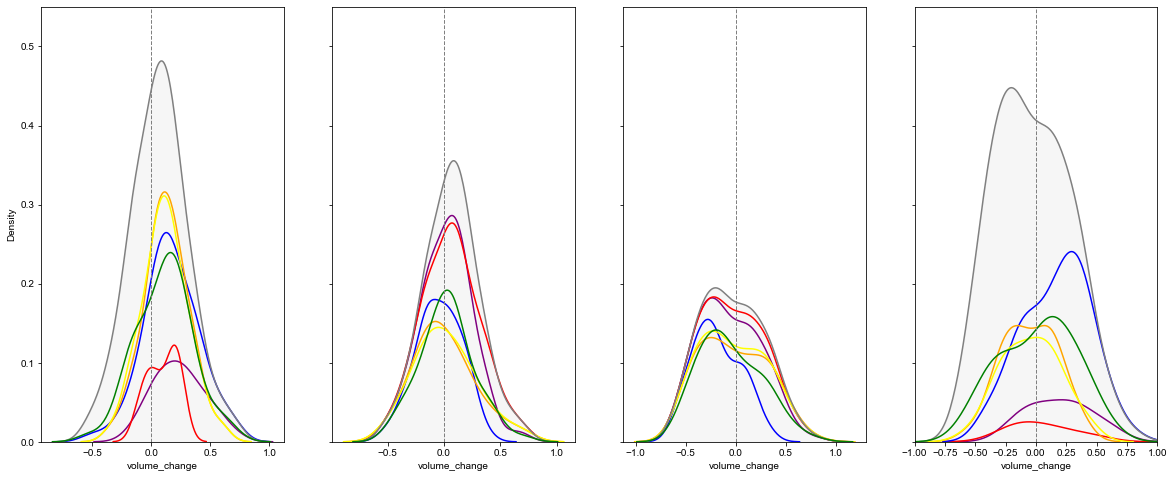

In [4]:
def kdeplot(df,quantity,limit_y,limit_x, subplot):
    sns.set_style('white')
    color=["green", "gray", "yellow","orange", "blue", "red", "purple"]
    g = sns.kdeplot(data=df, x=quantity, hue="predictor",palette=color, legend=False, ax=subplot)
    x = g.lines[-2].get_xdata()
    y = g.lines[-2].get_ydata()
    g.fill_between(x, 0, y, color='gray', alpha=0.07)
    g.axvline(0, color = 'gray', linestyle = 'dashed', linewidth = 1)
    plt.ylim(limit_y)
    plt.xlim(limit_x)

fig1,axes=plt.subplots(1,4, sharey=True, figsize=(20,8))
# Volume
kdeplot(Enriched_Success_dataset, quantity ='volume_change',limit_y=(0,0.55), limit_x=(-1,1), subplot=axes[0])
kdeplot(Enriched_Failure_dataset, quantity ='volume_change',limit_y=(0,0.55), limit_x=(-1,1), subplot=axes[1])
kdeplot(Depleted_Success_dataset, quantity ='volume_change',limit_y=(0,0.55), limit_x=(-1,1), subplot=axes[2])
kdeplot(Depleted_Failure_dataset, quantity ='volume_change',limit_y=(0,0.55), limit_x=(-1,1), subplot=axes[3])


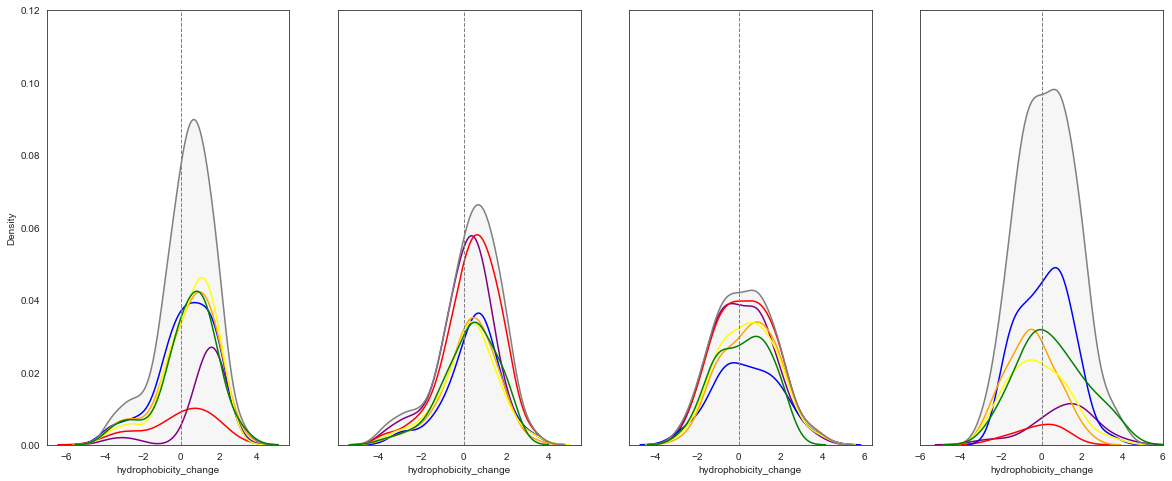

In [5]:
fig2,axes=plt.subplots(1,4, sharey=True,  figsize=(20,8))
# Hydrophobicity
kdeplot(Enriched_Success_dataset, quantity ='hydrophobicity_change',limit_y=(0,0.12), limit_x=(-6,6), subplot=axes[0])
kdeplot(Enriched_Failure_dataset, quantity ='hydrophobicity_change',limit_y=(0,0.12), limit_x=(-6,6), subplot=axes[1])
kdeplot(Depleted_Success_dataset, quantity ='hydrophobicity_change',limit_y=(0,0.12), limit_x=(-6,6), subplot=axes[2])
kdeplot(Depleted_Failure_dataset, quantity ='hydrophobicity_change',limit_y=(0,0.12), limit_x=(-6,6), subplot=axes[3])


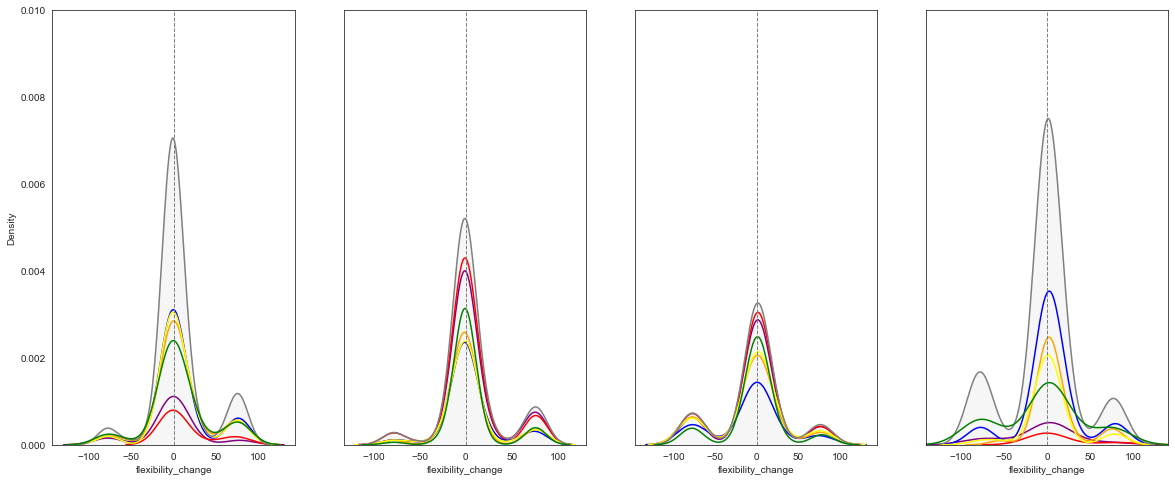

In [6]:
fig3,axes=plt.subplots(1,4, sharey=True,  figsize=(20,8))
# Flexibity
kdeplot(Enriched_Success_dataset, quantity ='flexibility_change',limit_y=(0,0.01), limit_x=(-140,140), subplot=axes[0])
kdeplot(Enriched_Failure_dataset, quantity ='flexibility_change',limit_y=(0,0.01), limit_x=(-140,140), subplot=axes[1])
kdeplot(Depleted_Success_dataset, quantity ='flexibility_change',limit_y=(0,0.01), limit_x=(-140,140), subplot=axes[2])
kdeplot(Depleted_Failure_dataset, quantity ='flexibility_change',limit_y=(0,0.01), limit_x=(-140,140), subplot=axes[3])



## ∆Success Rate Table

In [7]:
metrics = ['volume_change', 'hydrophobicity_change', 'flexibility_change']

table = []
for i in metrics:
    Enriched_Success_dataset_bigger_than_0 = Enriched_Success_dataset[Enriched_Success_dataset[i] >= 0]
    Depleted_Success_dataset_bigger_than_0 = Depleted_Success_dataset[Depleted_Success_dataset[i] >= 0]
    
    enr_haddock=round(len(Enriched_Success_dataset_bigger_than_0[Enriched_Success_dataset_bigger_than_0['predictor']=="HADDOCK"])/len(Enriched_Success_dataset_bigger_than_0[Enriched_Success_dataset_bigger_than_0['predictor']=="Experimental"])*100, 0)
    dep_haddock=round(len(Depleted_Success_dataset_bigger_than_0[Depleted_Success_dataset_bigger_than_0['predictor']=="HADDOCK"])/len(Depleted_Success_dataset_bigger_than_0[Depleted_Success_dataset_bigger_than_0['predictor']=="Experimental"])*100, 0)
    enr_foldx=round(len(Enriched_Success_dataset_bigger_than_0[Enriched_Success_dataset_bigger_than_0['predictor']=="FoldX"])/len(Enriched_Success_dataset_bigger_than_0[Enriched_Success_dataset_bigger_than_0['predictor']=="Experimental"])*100, 0)
    dep_foldx=round(len(Depleted_Success_dataset_bigger_than_0[Depleted_Success_dataset_bigger_than_0['predictor']=="FoldX"])/len(Depleted_Success_dataset_bigger_than_0[Depleted_Success_dataset_bigger_than_0['predictor']=="Experimental"])*100, 0)
    enr_foldxwater=round(len(Enriched_Success_dataset_bigger_than_0[Enriched_Success_dataset_bigger_than_0['predictor']=="FoldXwater"])/len(Enriched_Success_dataset_bigger_than_0[Enriched_Success_dataset_bigger_than_0['predictor']=="Experimental"])*100, 0)
    dep_foldxwater=round(len(Depleted_Success_dataset_bigger_than_0[Depleted_Success_dataset_bigger_than_0['predictor']=="FoldXwater"])/len(Depleted_Success_dataset_bigger_than_0[Depleted_Success_dataset_bigger_than_0['predictor']=="Experimental"])*100, 0)
    enr_evoef1=round(len(Enriched_Success_dataset_bigger_than_0[Enriched_Success_dataset_bigger_than_0['predictor']=="EvoEF1"])/len(Enriched_Success_dataset_bigger_than_0[Enriched_Success_dataset_bigger_than_0['predictor']=="Experimental"])*100, 0)
    dep_evoef1=round(len(Depleted_Success_dataset_bigger_than_0[Depleted_Success_dataset_bigger_than_0['predictor']=="EvoEF1"])/len(Depleted_Success_dataset_bigger_than_0[Depleted_Success_dataset_bigger_than_0['predictor']=="Experimental"])*100, 0)
    enr_mutabind2=round(len(Enriched_Success_dataset_bigger_than_0[Enriched_Success_dataset_bigger_than_0['predictor']=="MutaBind2"])/len(Enriched_Success_dataset_bigger_than_0[Enriched_Success_dataset_bigger_than_0['predictor']=="Experimental"])*100, 0)
    dep_mutabind2=round(len(Depleted_Success_dataset_bigger_than_0[Depleted_Success_dataset_bigger_than_0['predictor']=="MutaBind2"])/len(Depleted_Success_dataset_bigger_than_0[Depleted_Success_dataset_bigger_than_0['predictor']=="Experimental"])*100, 0)
    enr_ssipe=round(len(Enriched_Success_dataset_bigger_than_0[Enriched_Success_dataset_bigger_than_0['predictor']=="SSIPe"])/len(Enriched_Success_dataset_bigger_than_0[Enriched_Success_dataset_bigger_than_0['predictor']=="Experimental"])*100, 0)
    dep_ssipe=round(len(Depleted_Success_dataset_bigger_than_0[Depleted_Success_dataset_bigger_than_0['predictor']=="SSIPe"])/len(Depleted_Success_dataset_bigger_than_0[Depleted_Success_dataset_bigger_than_0['predictor']=="Experimental"])*100, 0)

    # create a dataframe
    x = pd.DataFrame([[enr_haddock,dep_haddock,enr_haddock-dep_haddock],
              [enr_foldx,dep_foldx,enr_foldx-dep_foldx],
              [enr_foldxwater,dep_foldxwater,enr_foldxwater-dep_foldxwater],
              [enr_evoef1,dep_evoef1,enr_evoef1-dep_evoef1],
              [enr_mutabind2,dep_mutabind2,enr_mutabind2-dep_mutabind2],
              [enr_ssipe,dep_ssipe,enr_ssipe-dep_ssipe]], columns=['Enriched success', "Depleted success","∆Success rate"])
    x = x.set_index([pd.Index(['HADDOCK', 'FoldX', 'FoldXwater', 'EvoEF1','MutaBind2', 'SSIPe'])])
    metric = f'{i}'
    key_name = metric[:-7].upper()
    x = pd.concat([x],keys=[key_name])
    table.append(x)

Volume = table[0]
Hydrophobicity = table[1]
Flexibility = table[2]

df = pd.concat([Volume,Hydrophobicity,Flexibility])
cm = sns.diverging_palette(220, 20, as_cmap=True)
x = df.style.format('{:.0f}')
x.set_table_styles([{'selector' : '','props' : [('border','1px solid black')]}])
table = x.background_gradient(cmap=cm, subset=["∆Success rate"], axis=None, vmin=-100, vmax=100 )
table = table.set_properties(**{'font-size': '13pt', 'font-family': 'Helvatica'})

table

In [8]:
def physicochemical_fig_dataset(df, prediction_status):
    haddock = df[df['haddock-ddg-prediction'].str.contains(prediction_status)]
    haddock_counts = haddock["physicochem_property_change"].value_counts()
    
    foldx = df[df['foldx-ddg-prediction'].str.contains(prediction_status)]
    foldx_counts = foldx["physicochem_property_change"].value_counts()

    foldxwater = df[df['foldxwater-ddg-prediction'].str.contains(prediction_status)]
    foldxwater_counts = foldxwater["physicochem_property_change"].value_counts()

    evoef1 = df[df['evoef1-ddg-prediction'].str.contains(prediction_status)]
    evoef1_counts = evoef1["physicochem_property_change"].value_counts()

    mutabind2 = df[df['mutabind2-ddg-prediction'].str.contains(prediction_status)]
    mutabind2_counts = mutabind2["physicochem_property_change"].value_counts()

    ssipe = df[df['ssipe-ddg-prediction'].str.contains(prediction_status)]
    ssipe_counts = ssipe["physicochem_property_change"].value_counts()
    counts=[haddock_counts, foldx_counts, foldxwater_counts, evoef1_counts, mutabind2_counts, ssipe_counts]
    df = pd.concat(counts, axis=1, keys=['HADDOCK', 'FoldX', 'FoldXwater', 'EvoEF1', 'MutaBind2', 'SSIPe']).replace(np.nan, 0)
    return(df)
 
#enriched and depleted datasets 
enriched = main_dataset[main_dataset.exp_binding >0 ]
depleted = main_dataset[main_dataset.exp_binding <0 ]

#Gray bars for dataset description, lights are enriched
experimental_enriched_counts = enriched["physicochem_property_change"].value_counts()
experimental_enriched = round(experimental_enriched_counts/263*100,2)
experimental_enriched = pd.DataFrame(experimental_enriched) 
experimental_enriched = experimental_enriched.T
#Gray bars for dataset description, darks are depleted
experimental_depleted_counts = depleted["physicochem_property_change"].value_counts()
experimental_depleted = round(experimental_depleted_counts/263*100,2)
experimental_depleted = pd.DataFrame(experimental_depleted) 
experimental_depleted = experimental_depleted.T
# Light bars for predictors
physicochemical_fig_enriched = physicochemical_fig_dataset(enriched, prediction_status="success")
enriched_ratio = round(physicochemical_fig_enriched/263*100,2)
enriched_ratio = enriched_ratio.T
# Dark bars for predictors
physicochemical_fig_depleted = physicochemical_fig_dataset(depleted, prediction_status="success")
depleted_ratio = round(physicochemical_fig_depleted/263*100,2)
depleted_ratio = depleted_ratio.T


<ipython-input-9-46bb139fd63f>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set(yticklabels=["Exp. dataset"])


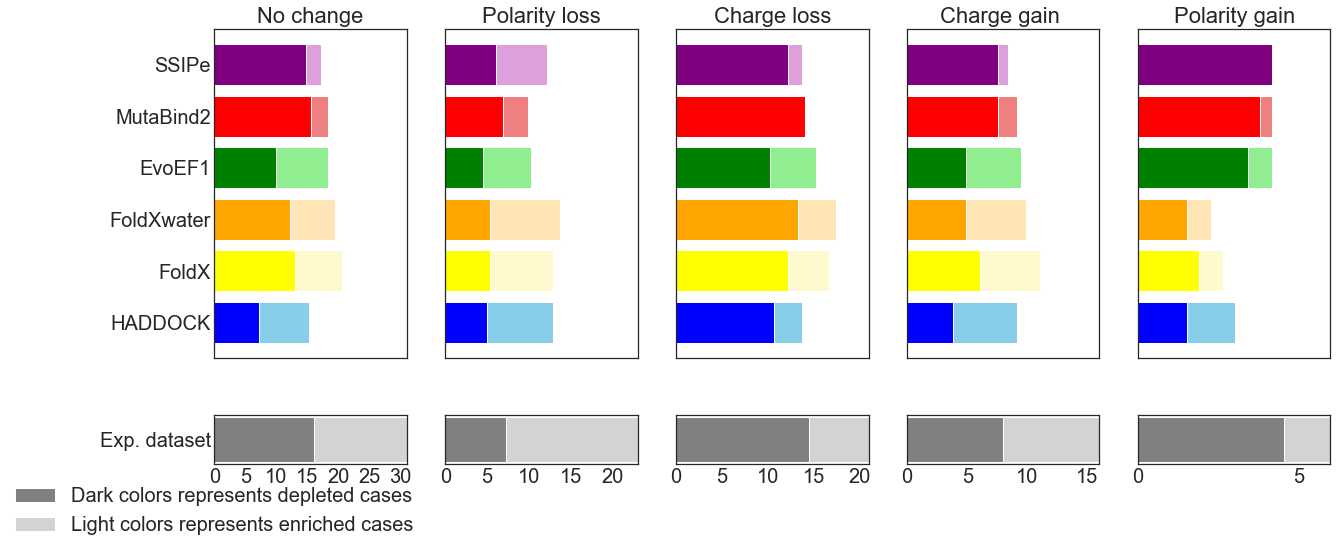

In [9]:
mpl.style.use('seaborn-white')

# predictors
colors_depleted = ['blue', "yellow", "orange", "green", "red", "purple" ]
colors_enriched = ['skyblue', "lemonchiffon" ,"moccasin", "lightgreen", "lightcoral", "plum" ]
labels = ['HADDOCK', 'FoldX', 'FoldXwater','EvoEF1', 'MutaBind2', 'SSIPe']
labels_exp='Experimental'
mpl.rcParams.update({'font.size': 20})

fig4, axs = plt.subplots(2, 5, figsize=(20,8), gridspec_kw={'height_ratios': [2, 0.3]})

axs[0, 0].set_title('No change', size=22)
axs[0, 1].set_title('Polarity loss', size=22)
axs[0, 2].set_title('Charge loss', size=22)
axs[0, 3].set_title('Charge gain ', size=22)
axs[0, 4].set_title('Polarity gain', size=22)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)

# experimental
axs[1, 0].barh(labels_exp, experimental_depleted["no_change"], label='Depleted', color="gray")
axs[1, 0].barh(labels_exp, experimental_enriched["no_change"], label='Enriched', left=experimental_depleted["no_change"], color="lightgray")
nochange_xlim=int(experimental_enriched["no_change"][0] + experimental_depleted["no_change"][0])
axs[1, 0].set_xlim([0, nochange_xlim])
axs[1, 0].xaxis.set_ticks(np.arange(0, nochange_xlim, 5))
axs[1, 0].set(yticklabels=["Exp. dataset"])

axs[1, 1].barh(labels_exp, experimental_depleted["polarity_loss"], label='Depleted', color="gray")
axs[1, 1].barh(labels_exp, experimental_enriched["polarity_loss"], label='Enriched', left=experimental_depleted["polarity_loss"], color="lightgray")
polarityloss_xlim=int(experimental_enriched["polarity_loss"][0] + experimental_depleted["polarity_loss"][0])
axs[1, 1].set_xlim([0, polarityloss_xlim])
axs[1, 1].set(yticklabels=[])
axs[1, 1].xaxis.set_ticks(np.arange(0, polarityloss_xlim, 5))


axs[1, 2].barh(labels_exp, experimental_depleted["charge_loss"], label='Depleted', color="gray")
axs[1, 2].barh(labels_exp, experimental_enriched["charge_loss"], label='Enriched', left=experimental_depleted["charge_loss"], color="lightgray")
chargeloss_xlim=int(experimental_enriched["charge_loss"][0] + experimental_depleted["charge_loss"][0])
axs[1, 2].set_xlim([0, chargeloss_xlim])
axs[1, 2].set(yticklabels=[])
axs[1, 2].xaxis.set_ticks(np.arange(0, chargeloss_xlim, 5))

axs[1, 3].barh(labels_exp, experimental_depleted["charge_gain"], label='Depleted', color="gray")
axs[1, 3].barh(labels_exp, experimental_enriched["charge_gain"], label='Enriched', left=experimental_depleted["charge_gain"], color="lightgray")
chargegain_xlim=int(experimental_enriched["charge_gain"][0] + experimental_depleted["charge_gain"][0])
axs[1, 3].set_xlim([0, chargegain_xlim])
axs[1, 3].set(yticklabels=[])
axs[1, 3].xaxis.set_ticks(np.arange(0, chargegain_xlim, 5))

axs[1, 4].barh(labels_exp, experimental_depleted["polarity_gain"], label='Depleted', color="gray")
axs[1, 4].barh(labels_exp, experimental_enriched["polarity_gain"], label='Enriched', left=experimental_depleted["polarity_gain"], color="lightgray")
polaritygain_xlim=int(experimental_enriched["polarity_gain"][0] + experimental_depleted["polarity_gain"][0])
axs[1, 4].set_xlim([0, polaritygain_xlim])
axs[1, 4].set(yticklabels=[])
axs[1, 4].xaxis.set_ticks(np.arange(0, polaritygain_xlim, 5))


#no change
axs[0, 0].barh(labels, depleted_ratio["no_change"], label='Depleted', color=colors_depleted)
axs[0, 0].barh(labels, enriched_ratio["no_change"], label='Enriched', left=depleted_ratio["no_change"], color=colors_enriched)
axs[0, 0].set_xlim([0, nochange_xlim])
axs[0, 0].set(xticklabels=[])

#polarity_loss
axs[0, 1].barh(labels, depleted_ratio["polarity_loss"], label='Depleted', color=colors_depleted)
axs[0, 1].barh(labels, enriched_ratio["polarity_loss"], label='Enriched', left=depleted_ratio["polarity_loss"], color=colors_enriched)
axs[0, 1].set_xlim([0, polarityloss_xlim])
axs[0, 1].set(yticklabels=[])
axs[0, 1].set(xticklabels=[])

#charge_gain
axs[0, 2].barh(labels, depleted_ratio["charge_loss"], label='Depleted', color=colors_depleted,)
axs[0, 2].barh(labels, enriched_ratio["charge_loss"], label='Enriched', left=depleted_ratio["charge_loss"], color=colors_enriched)
axs[0, 2].set_xlim([0, chargeloss_xlim])
axs[0, 2].set(yticklabels=[])
axs[0, 2].set(xticklabels=[])

#charge_gain
axs[0, 3].barh(labels, depleted_ratio["charge_gain"], label='Depleted', color=colors_depleted,)
axs[0, 3].barh(labels, enriched_ratio["charge_gain"], label='Enriched', left=depleted_ratio["charge_gain"], color=colors_enriched)
axs[0, 3].set_xlim([0, chargegain_xlim])
axs[0, 3].set(yticklabels=[])
axs[0, 3].set(xticklabels=[])

#polarity_gain
axs[0, 4].barh(labels, depleted_ratio["polarity_gain"], label='Depleted', color=colors_depleted,)
axs[0, 4].barh(labels, enriched_ratio["polarity_gain"], label='Enriched', left=depleted_ratio["polarity_gain"], color=colors_enriched)
axs[0, 4].set_xlim([0, polaritygain_xlim])
axs[0, 4].set(yticklabels=[])
axs[0, 4].set(xticklabels=[])

# legend
axs[1, 0].legend(['Dark colors represents depleted cases', 'Light colors represents enriched cases'], loc = 'lower center', bbox_to_anchor = (0, -1.8), fontsize=20)


In [10]:
figures=[fig1,fig2,fig3,fig4]
with PdfPages('Figure.pdf') as pdf:
    for i in figures:
        pdf.savefig(i)